## Econ 212

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm # HP filter and OLS regression
import datetime
from datetime import datetime as dt
import matplotlib.dates as mdates

In [5]:
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 2.5

In [6]:
import data_load

Function to take best linear fit, decadal average growth

In [7]:
def reg_fit(Y,X, verbose=False):
    X = sm.add_constant(X)
    model=sm.OLS(Y,X)
    results = model.fit()
    if verbose:
        print(results.summary())
    return results.predict(), results.params

def decadal_average_growth(ser, dec=False):
    if dec:
        # Actual decadal growh
        t=ser.loc['1950-03-31':'1959-12-31']
        nq=t.index.size
        print('Average for 1950s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['1960-03-31':'1969-12-31']
        nq=t.index.size
        print('Average for 1960s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['1970-03-31':'1979-12-31']
        nq=t.index.size
        print('Average for 1970s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['1980-03-31':'1989-12-31']
        nq=t.index.size
        print('Average for 1980s :', round(np.log(t[-1]/t[0])/(nq/4),4))  

        t=ser.loc['1990-03-31':'1999-12-31']
        nq=t.index.size
        print('Average for 1990s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['2000-03-31':'2009-12-31']
        nq=t.index.size
        print('Average for 2000s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['2010-03-31':'2019-12-31']
        nq=t.index.size
        print('Average for 2010s :', round(np.log(t[-1]/t[0])/(nq/4),4))
    else:
        # 20-year growth
        t=ser.loc['1950-03-31':'1969-12-31']
        nq=t.index.size
        print('Average for 1950/60 :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['1970-03-31':'1999-12-31']
        nq=t.index.size
        print('Average for 1970/80 :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['2000-03-31':'2019-12-31']
        nq=t.index.size
        print('Average for 2000/10 :', round(np.log(t[-1]/t[0])/(nq/4),4))


# Quarterly data

Load data, can use either `same_def` or `own_def` for own deflator

In [8]:
series = data_load.get_fred_data('Q','own_def')

In [9]:
stateu = data_load.get_state_u_data('Q')

#### Sample selection

In [10]:
series = series.loc['1952-03-31':dt.now().strftime('%Y-%m-%d')]
series.tail()

,yn,cn,gn,in,nxn,impn,expn,y,c,g,...,USREC,k,ypotn,ypot,totres,ioer,dgs10,breakeven10,nondur,dur
date,,,,,,,,,,,,,,,,,,,,,
2022-09-30,25994.639,17684.189,4477.855,4724.621,-892.026,3976.524,3084.498,21851.134,15127.399,3666.982,...,0.0,69059464.0,25968.85,20245.66,3232.000000,NaN,3.101094,2.421250,968962.0,534857.0
2022-12-31,26408.405,17917.039,4572.408,4796.162,-877.204,3891.004,3013.800,21989.981,15171.391,3714.800,...,0.0,69059464.0,26334.48,20334.21,3096.400000,NaN,3.826721,2.340000,1041528.0,562801.0
2023-03-31,26813.601,18269.569,4643.890,4725.828,-825.687,3890.491,3064.804,22112.329,15312.850,3758.768,...,0.0,69059464.0,26714.29,20420.68,3103.366667,NaN,3.646290,2.290806,924822.0,510804.0
2023-06-30,27063.012,18419.007,4669.808,4780.290,-806.093,3767.851,2961.759,22225.350,15343.553,3789.786,...,0.0,69059464.0,26978.75,20511.89,3256.900000,NaN,3.595714,2.226032,989245.0,557424.0
2023-09-30,27644.463,18711.558,4792.453,4922.073,-781.620,3819.278,3037.657,22506.365,15479.540,3840.946,...,0.0,69059464.0,27272.95,20603.70,3215.433333,NaN,4.149683,2.325079,996800.0,550380.0


#### Construct extra variables

In [11]:
NQ=series.index.size # Number of quarters in data
series['ypop']=series['y']/series['pop'] # Output per person
series['t']=np.arange(0,NQ) # Output per person

## Begin Graphs

## GDP per Person vs a linear trend (Figure 1 Lecture 1)

In [12]:
series['ylogfit'], regparams=reg_fit(np.log(series['y']), series['t'], verbose=False)

Text(0.5, 1.0, 'U.S. real GDP ($Y_t$)')

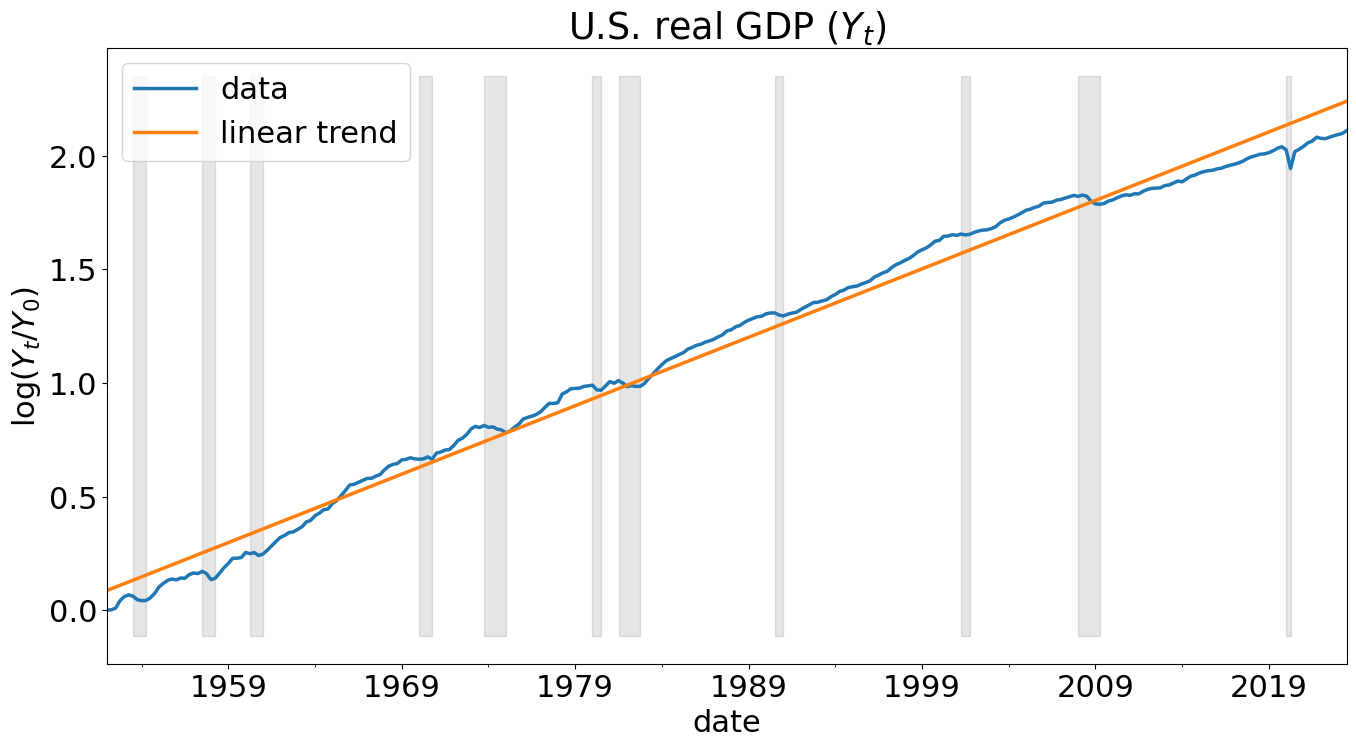

In [13]:
(np.log(series['y'])-np.log(series['y'][0])).plot(label='data')
(series['ylogfit']-np.log(series['y'][0])).plot(label='linear trend')
yl, yh = plt.ylim()
plt.legend()
plt.ylabel(r'$\log(Y_t/Y_{0})$')
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title('U.S. real GDP ($Y_t$)')

## Taking Out the Trend: The HP Filter (Lecture 1 Figure 2)

In [14]:
#cycle_ypop, trend_ypop=sm.tsa.filters.hpfilter(np.log(series['ypop']),100000000000)
#lambdahp=100000000000
lambdahp=1600
cycle_y, trend_y=sm.tsa.filters.hpfilter(np.log(series['y']),lambdahp)
cycle_ypop, trend_ypop=sm.tsa.filters.hpfilter(np.log(series['ypop']),lambdahp)
#trend_bk.plot()

Text(0.5, 1.0, 'US log real GDP per person')

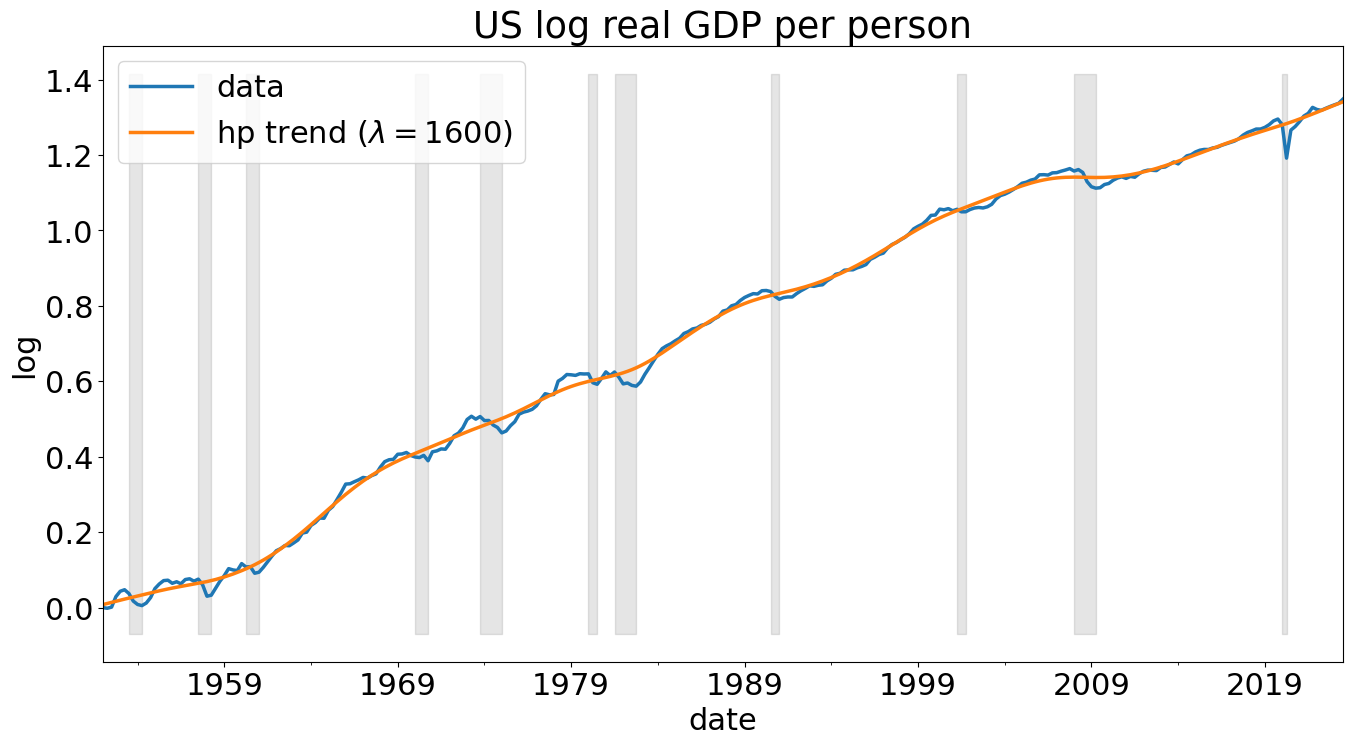

In [15]:
(np.log(series['ypop'])-np.log(series['ypop'][0])).plot(label='data')
(trend_ypop-np.log(series['ypop'][0])).plot(label=r'hp trend ($\lambda=1600$)')
yl, yh = plt.ylim()
plt.ylabel('log')
plt.legend()
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title('US log real GDP per person')
# plt.savefig(f'Export/us_log_realgdp_hptrend.pdf', format='pdf', transparent=True);

## US output: detrending matters, Business cycles more severe & persistent... (Lecture 1 Figure 3)

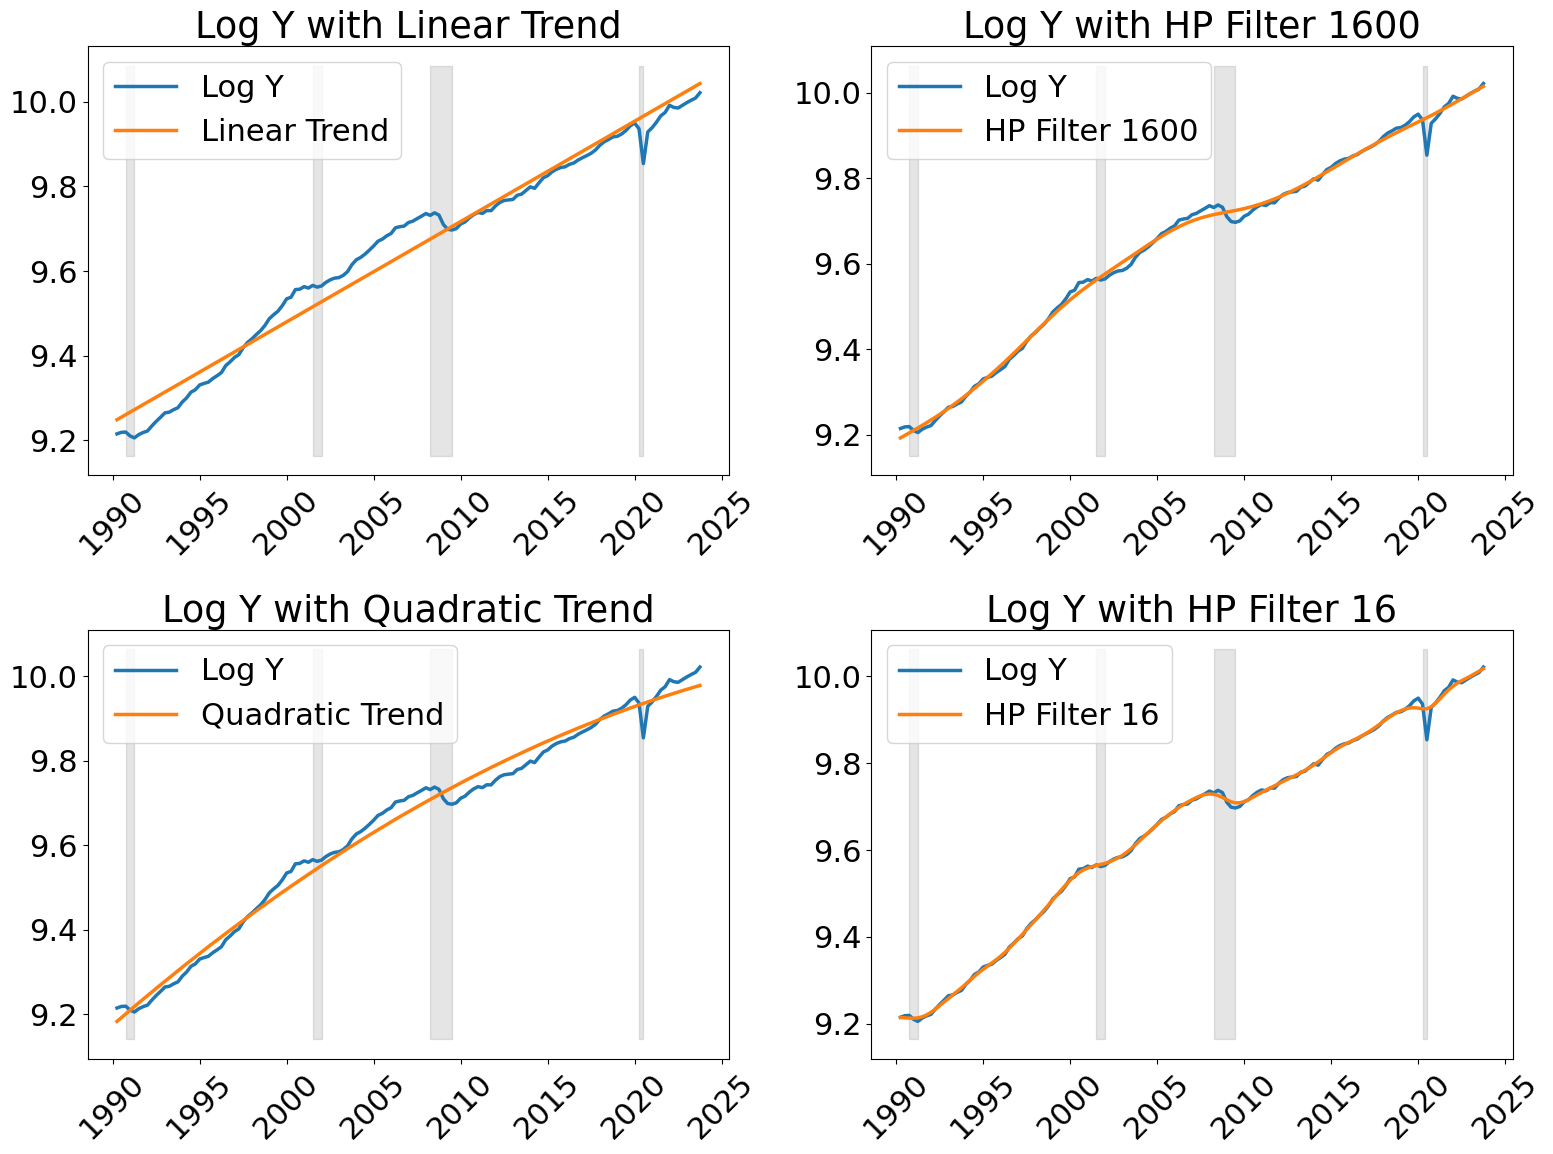

In [16]:
# Filter the DataFrame to start from 1990 and make a copy to avoid SettingWithCopyWarning
series = series[series.index >= '1990-01-01'].copy()

# Recalculate 't' since we are starting from 1990 now
series['t'] = np.arange(len(series)) # Time index

# Log of GDP
series['ylog'] = np.log(series['y'])

# Linear Trend
series['ylogfit'], regparams = reg_fit(series['ylog'], series['t'], verbose=False)

# HP Filters
lambdahp_1600 = 1600
lambdahp_16 = 16
cycle_y_1600, trend_y_1600 = sm.tsa.filters.hpfilter(series['ylog'], lambdahp_1600)
cycle_y_16, trend_y_16 = sm.tsa.filters.hpfilter(series['ylog'], lambdahp_16)

# Quadratic Trend
series['t_sq'] = series['t'] ** 2
X_quad = sm.add_constant(series[['t', 't_sq']])
model_quad = sm.OLS(series['ylog'], X_quad)
results_quad = model_quad.fit()
quad_fit = results_quad.predict(X_quad)

# Creating subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12)) # 2x2 subplots

# Top-Left: Linear Trend
axs[0, 0].plot(series.index, series['ylog'], label='Log Y')
axs[0, 0].plot(series.index, series['ylogfit'], label='Linear Trend')
axs[0, 0].set_title('Log Y with Linear Trend')
axs[0, 0].legend()

# Top-Right: HP Filter 1600
axs[0, 1].plot(series.index, series['ylog'], label='Log Y')
axs[0, 1].plot(series.index, trend_y_1600, label='HP Filter 1600')
axs[0, 1].set_title('Log Y with HP Filter 1600')
axs[0, 1].legend()

# Bottom-Left: Quadratic Trend
axs[1, 0].plot(series.index, series['ylog'], label='Log Y')
axs[1, 0].plot(series.index, quad_fit, label='Quadratic Trend')
axs[1, 0].set_title('Log Y with Quadratic Trend')
axs[1, 0].legend()

# Bottom-Right: HP Filter 16
axs[1, 1].plot(series.index, series['ylog'], label='Log Y')
axs[1, 1].plot(series.index, trend_y_16, label='HP Filter 16')
axs[1, 1].set_title('Log Y with HP Filter 16')
axs[1, 1].legend()

# Adding recession shades to all subplots
for ax in axs.flat:
    ax.fill_between(series.index, *ax.get_ylim(), where=series['USREC'].values, color='k', alpha=0.1)

for ax in axs.flat:
    ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Show year label every 5 years
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format to display only the year
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)  # Rotate labels to avoid overlap


plt.tight_layout()
plt.show()

## US output: detrending matters (Lecture 1 Figure 4a)

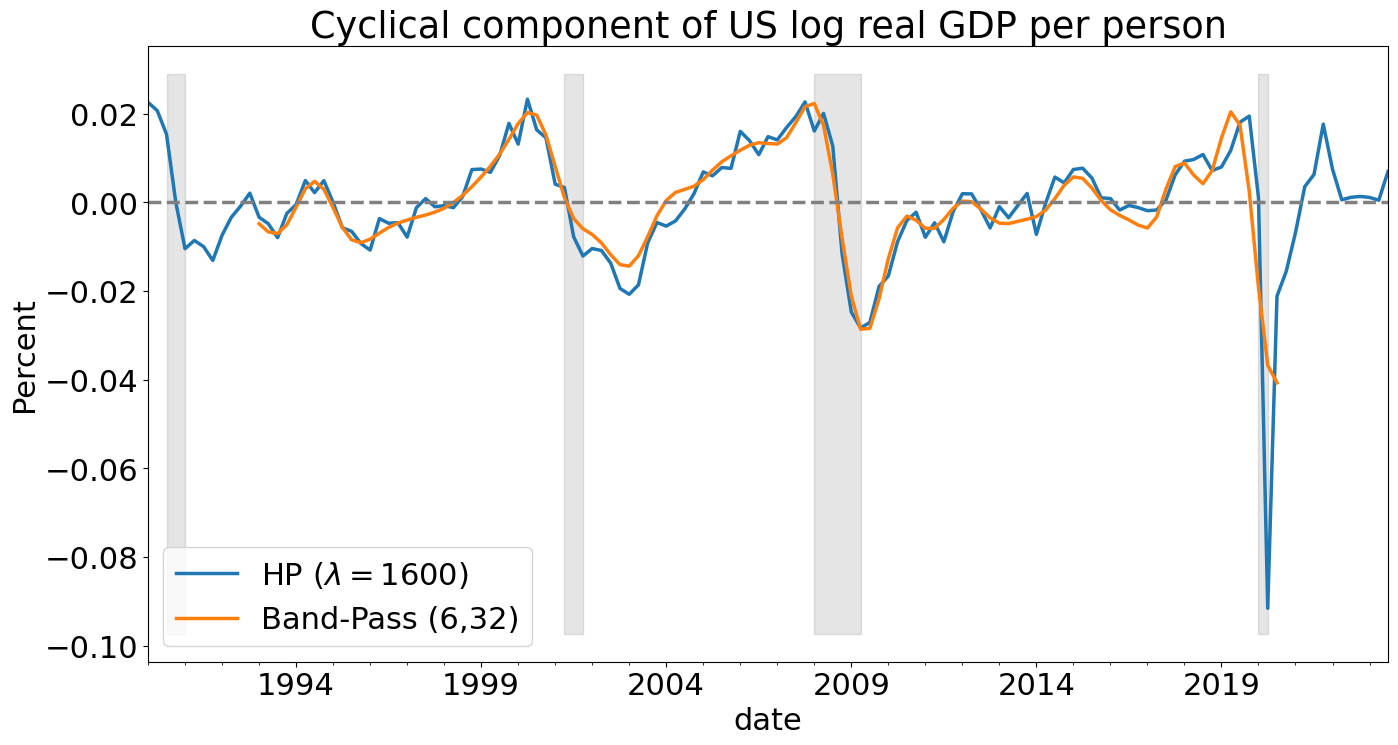

In [17]:
# Your existing code for the HP and Band-Pass filters
cycle_ypop, trend_ypop = sm.tsa.filters.hpfilter(np.log(series['ypop']), lambdahp)
cycle_ypop_bp = sm.tsa.filters.bkfilter(np.log(series['ypop']), low=6, high=32, K=12)

# Plotting the HP cycle
cycle_ypop.plot(label=r'HP ($\lambda=1600$)')

# Plotting the Band-Pass cycle
cycle_ypop_bp.plot(label='Band-Pass (6,32)')

# Setting the y-axis limits, labels, and adding legend
yl, yh = plt.ylim()
plt.ylabel('Percent')
plt.legend()

# Draw shaded areas for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)

# Adding a title
plt.title('Cyclical component of US log real GDP per person')

# Drawing a horizontal line at y=0
plt.axhline(y=0, color='gray', linestyle='--')

# Uncomment the following line to save the plot
# plt.savefig(f'Export/us_log_realgdp_cycle.pdf', format='pdf', transparent=True)

plt.show()

## US output: detrending matters (Lecture 1 Figure 4b)

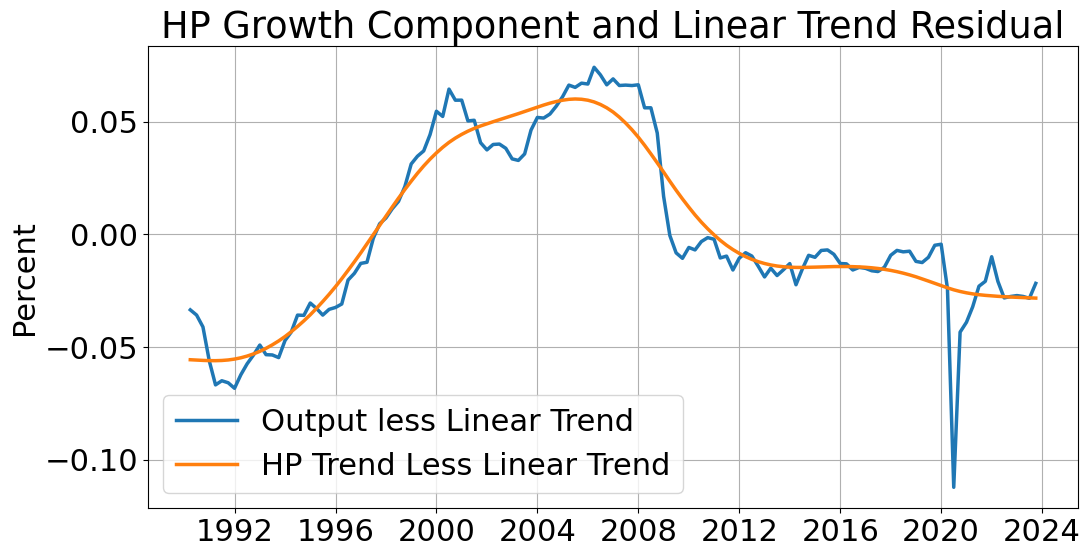

In [18]:
# Calculate 'Output less Linear Trend'
output_less_linear_trend = (np.log(series['y']) - series['ylogfit'])

# Calculate 'HP Trend Less Linear Trend'
hp_trend_less_linear_trend = (trend_y_1600 - series['ylogfit'])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(series.index, output_less_linear_trend, label="Output less Linear Trend")
plt.plot(series.index, hp_trend_less_linear_trend, label="HP Trend Less Linear Trend")

# Setting labels and title
plt.ylabel('Percent')
plt.title('HP Growth Component and Linear Trend Residual')
plt.legend()

# Add grid for better readability
plt.grid(True)

# Uncomment the following line to save the plot
# plt.savefig('hp_growth_component_and_linear_trend_residual.pdf', format='pdf', transparent=True)

plt.show()

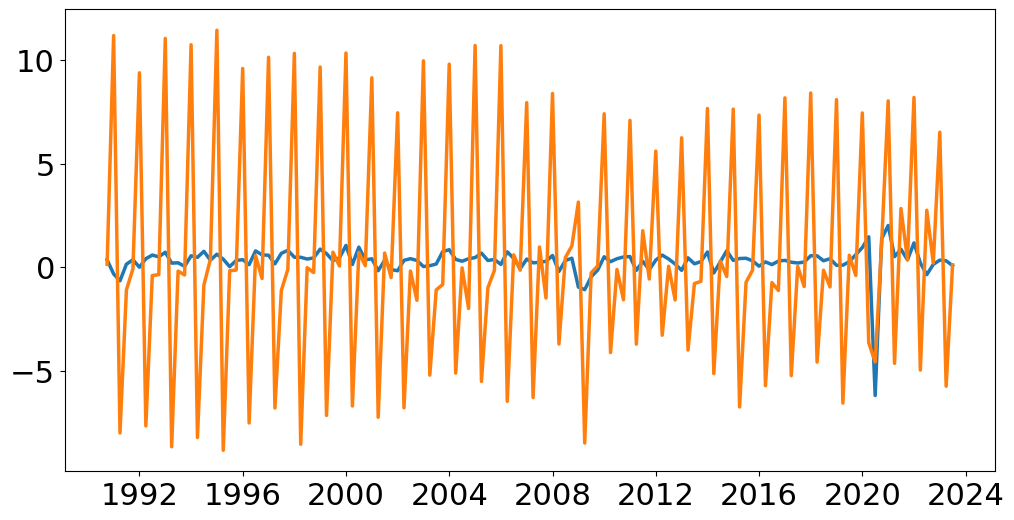

In [69]:


# Assuming 'series' is your DataFrame and dates are the index in datetime format

# Calculate a simple moving average for detrending
window = 4  # Adjust window size as needed for your trend estimation
series['y_trend'] = series['y'].rolling(window=window, center=True).mean()
series['nondur_trend'] = series['nondur'].rolling(window=window, center=True).mean()

# Calculate the percent deviation from the trend
series['y_pct_dev'] = ((series['y'] - series['y_trend']) / series['y_trend']) * 100
series['nondur_pct_dev'] = ((series['nondur'] - series['nondur_trend']) / series['nondur_trend']) * 100

# Plotting on the same graph
plt.figure(figsize=(12, 6))

# Plot the percent deviation for GDP ('y') and Non-Durable Goods ('nondur')
plt.plot(series.index, series['y_pct_dev'], label='GDP Output Deviation')
plt.plot(series.index, series['nondur_pct_dev'], label='Non-Durable Goods Consumption Deviation')

plt.show()


### Unemployment, Okun's law, basic correlations between growth rates

Text(0.5, 1.0, 'U.S. unemployment ($u_t$)')

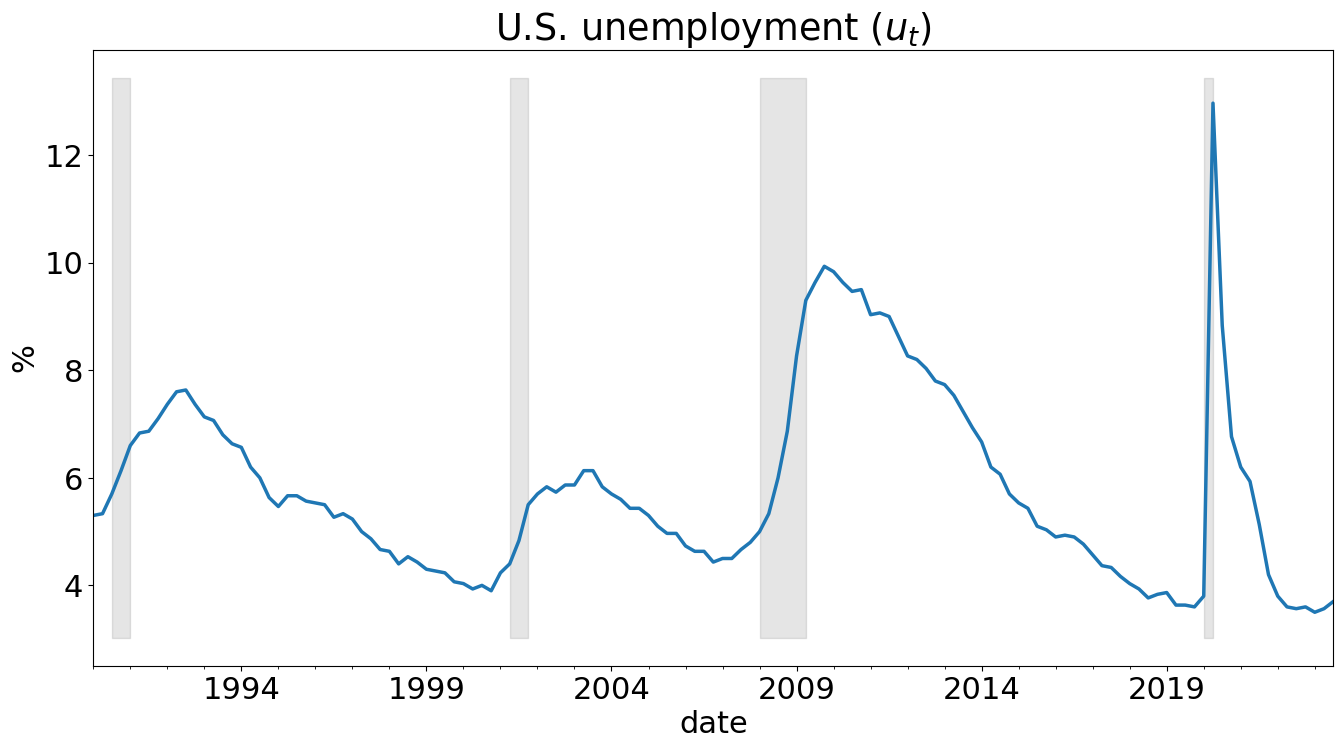

In [19]:
series['u'].plot()
yl, yh = plt.ylim()
plt.ylabel('%')
#plt.legend()
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title(r'U.S. unemployment ($u_t$)')
# plt.savefig(f'Export/us_unempl.pdf', format='pdf', transparent=True);

### Across selected states

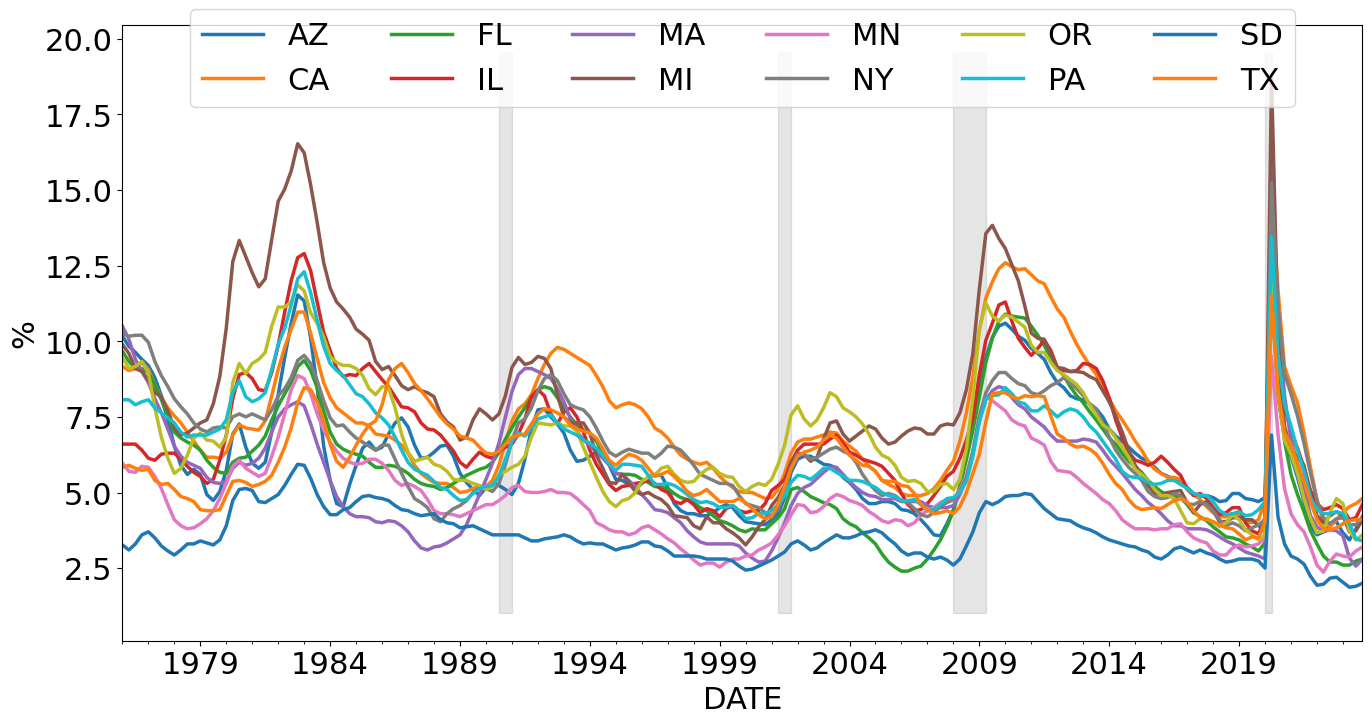

In [20]:
stateu[["AZ","CA","FL","IL","MA","MI","MN","NY","OR","PA","SD","TX"]].plot()
yl, yh = plt.ylim()
plt.ylabel('%')
#plt.legend()
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
#plt.legend(loc='upper center',  ncol=1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=6)
# plt.savefig(f'Export/us_unempl_state.pdf', format='pdf', transparent=True);

Add national unemployment series to dataframe, take growth of u

In [21]:
stateu["nat"]=series['u']
# Last row of corr gives correlation with "nat"
natcorr=stateu.diff().iloc[1:].corr().iloc[-1]

Text(0.5, 1.0, 'Correlation between national $\\Delta u$ and state $\\Delta u$')

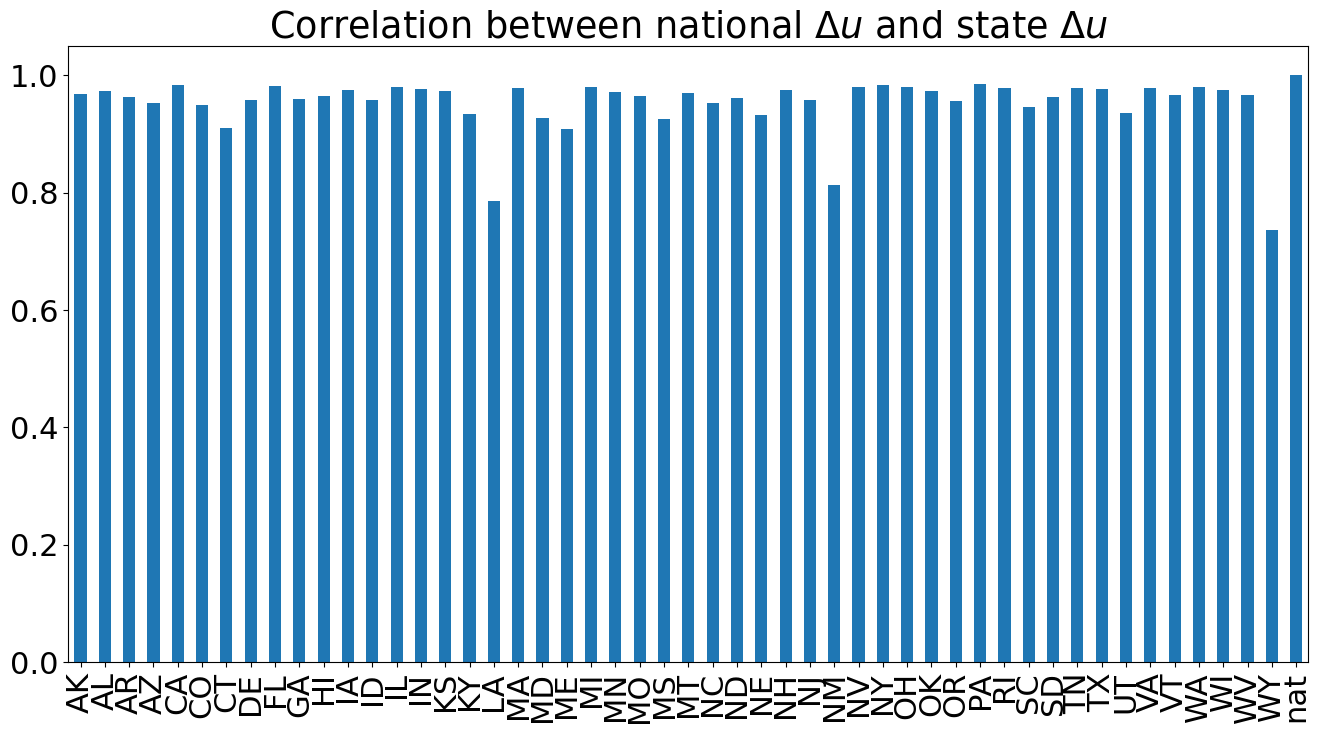

In [22]:
natcorr.plot.bar(rot=90)
plt.title('Correlation between national $\Delta u$ and state $\Delta u$')

In [23]:
# Pre-covid
seriespre=series.loc['1952-03-31':'2019-12-31']

Okun's law: change in unemployment rate vs GDP growth rate

Chad does this with unemployment gap vs output gap, but requires measures of natural rates, so not good for me. He says 
$$ u-\overline{u} = -1/2 (\log(y/ypot)) $$

Text(0.5, 1.0, 'Change in unemployment $\\Delta u_t$ vs growth in GDP $\\Delta \\log Y_t$')

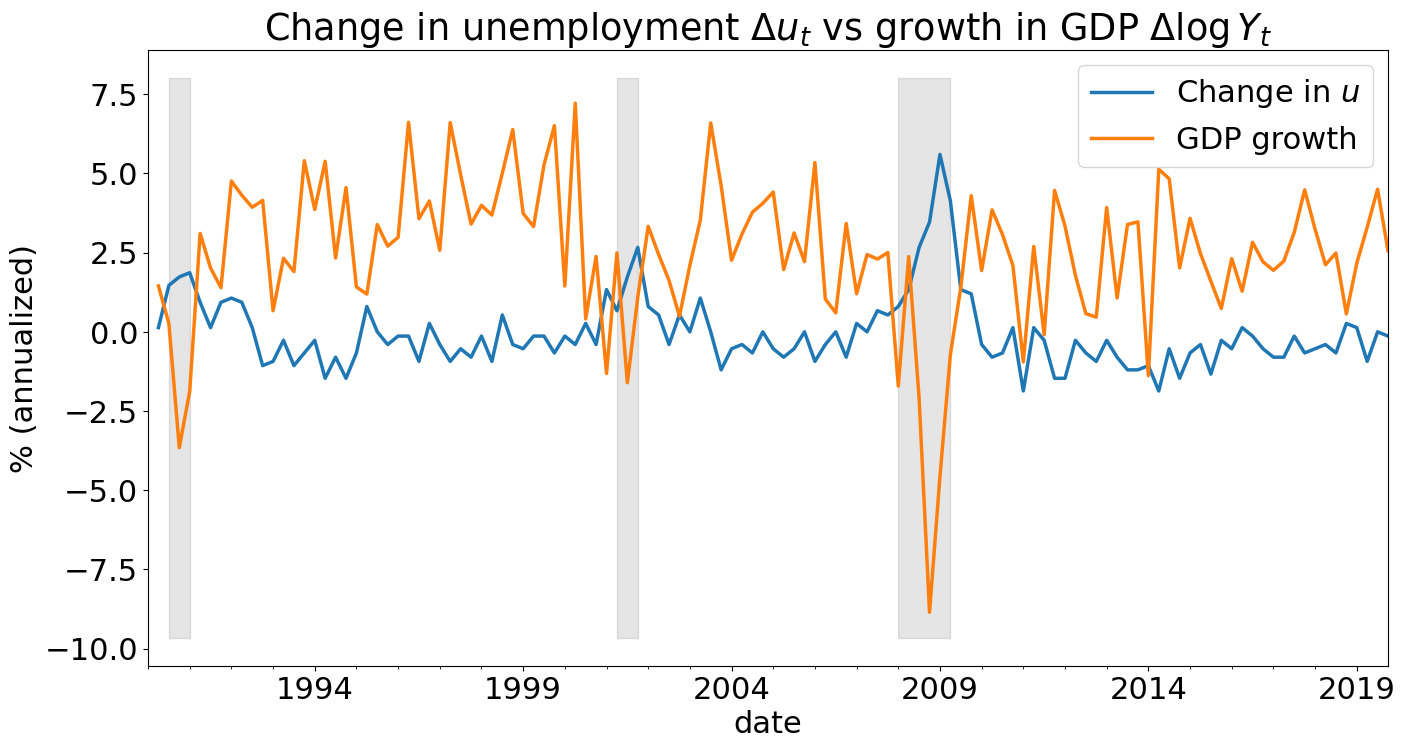

In [24]:
du=seriespre['u'].diff() # change in the unemployment rate in pp
dy=100*np.log(seriespre['y']).diff() # change in GDP in %
dc=100*np.log(seriespre['c']).diff() # change in GDP in %
di=100*np.log(seriespre['i']).diff() # change in GDP in %
dg=100*np.log(seriespre['g']).diff() # change in GDP in %
de=100*np.log(seriespre['emp']).diff() # employment 
dh=100*np.log(seriespre['h']).diff() # employment = total hours
dn=100*np.log(seriespre['h']*seriespre['emp']).diff() # hours worked per person * employment = total hours
dk=100*np.log(seriespre['k']).diff() 

duann=4*du #-du.mean()
dyann=4*dy #-dy.mean()
dcann=4*dc
diann=4*di
dgann=4*dg
dnann=4*dn
dkann=4*dk
deann=4*de
dhann=4*dh



duann.plot(label=r'Change in $u$')
dyann.plot(label=r'GDP growth')
yl, yh = plt.ylim()
plt.legend()
plt.ylabel('% (annualized)')
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title(r'Change in unemployment $\Delta u_t$ vs growth in GDP $\Delta \log Y_t$')
# plt.savefig(f'Export/okun_timeseries.pdf', format='pdf', transparent=True);

Look at correlation: -0.8

In [25]:
duy=pd.DataFrame(data={'du':duann[1:],'dy':dyann[1:], 'dc':dcann[1:], 'di':diann[1:], 'dg':dgann[1:], 'dn':dnann[1:], 'dk':dkann[1:], 'de':deann[1:], 'dh':dhann[1:]})
duy.corr()

,du,dy,dc,di,dg,dn,dk,de,dh
du,1.000000,-0.554908,-0.455205,-0.630177,0.304197,-0.821236,-0.134383,-0.848631,-0.441063
dy,-0.554908,1.000000,0.680735,0.780655,0.124911,0.642994,0.345346,0.593694,0.454756
dc,-0.455205,0.680735,1.000000,0.301618,0.055905,0.505261,0.484477,0.531008,0.257608
di,-0.630177,0.780655,0.301618,1.000000,-0.231763,0.675501,0.179325,0.592189,0.526497
dg,0.304197,0.124911,0.055905,-0.231763,1.000000,-0.252241,0.136183,-0.216415,-0.203896
dn,-0.821236,0.642994,0.505261,0.675501,-0.252241,1.000000,0.278210,0.901063,0.741683
dk,-0.134383,0.345346,0.484477,0.179325,0.136183,0.278210,1.000000,0.356361,0.042902
de,-0.848631,0.593694,0.531008,0.592189,-0.216415,0.901063,0.356361,1.000000,0.377406
dh,-0.441063,0.454756,0.257608,0.526497,-0.203896,0.741683,0.042902,0.377406,1.000000


Regression coefficient: -1.66 (vs simplest model would be $-\alpha$)

In [26]:
# model=sm.OLS(duy['dy'],duy['du'])
# results = model.fit()
# print(results.summary())
# fitted = model.fit().predict()

fitted, regparams=reg_fit(duy['dy'],duy['du'], verbose=True)


                            OLS Regression Results                            
Dep. Variable:                     dy   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     52.06
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           5.81e-11
Time:                        12:08:47   Log-Likelihood:                -247.02
No. Observations:                 119   AIC:                             498.0
Df Residuals:                     117   BIC:                             503.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4046      0.179     13.468      0.0

/Users/awellman/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


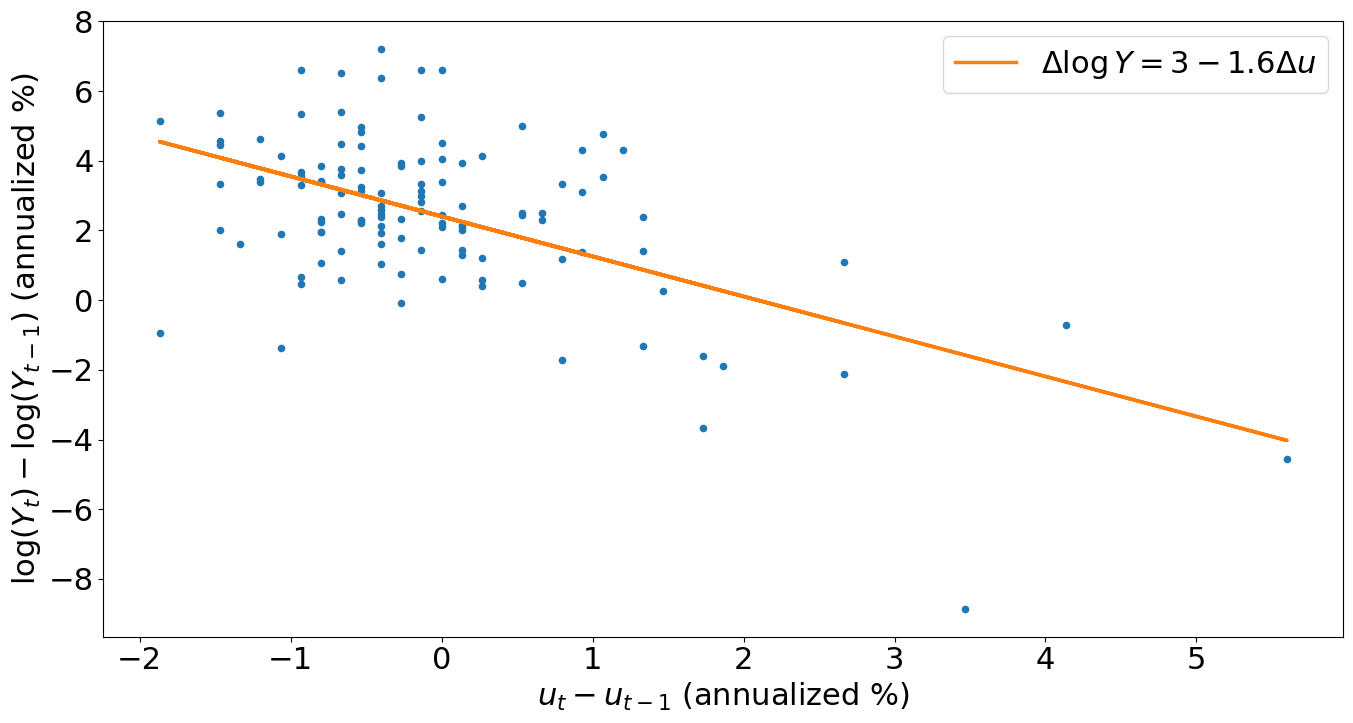

In [27]:
duy.plot.scatter(x='du', y='dy')
plt.plot(duy['du'], fitted, color='tab:orange', label=r'$\Delta \log Y = 3 - 1.6 \Delta u$')
plt.xlabel(r'$u_t - u_{t-1}$ (annualized %)')
plt.ylabel(r'$\log(Y_t)-\log(Y_{t-1})$ (annualized %)')
plt.legend()
# plt.savefig(f'Export/okun_cross_X.pdf', format='pdf', transparent=True);

So, best summary of Okun's law in data at the Q level is
$$ dlogy_t = 0.75 -1.6 du_t$$

This means that growth in y is $2.5\% - 1.6* change in u$ this year. 
- Annual level: unemployment rate changes this year (say from 7 to 10pp), the gdp growth rate tends to fall by 1.5*3=4.5pp (from 1.5 to -3)
- Longer period, tends to attenuate. Eg, unemployment rate in the recession frose from 4 to 10 (by 6), GDP growth rate fell from 3 to -3

                            OLS Regression Results                            
Dep. Variable:                     dc   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     101.0
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           1.64e-17
Time:                        12:08:48   Log-Likelihood:                -211.70
No. Observations:                 119   AIC:                             427.4
Df Residuals:                     117   BIC:                             433.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2569      0.194      6.491      0.0

/Users/awellman/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


(-12.0, 16.0)

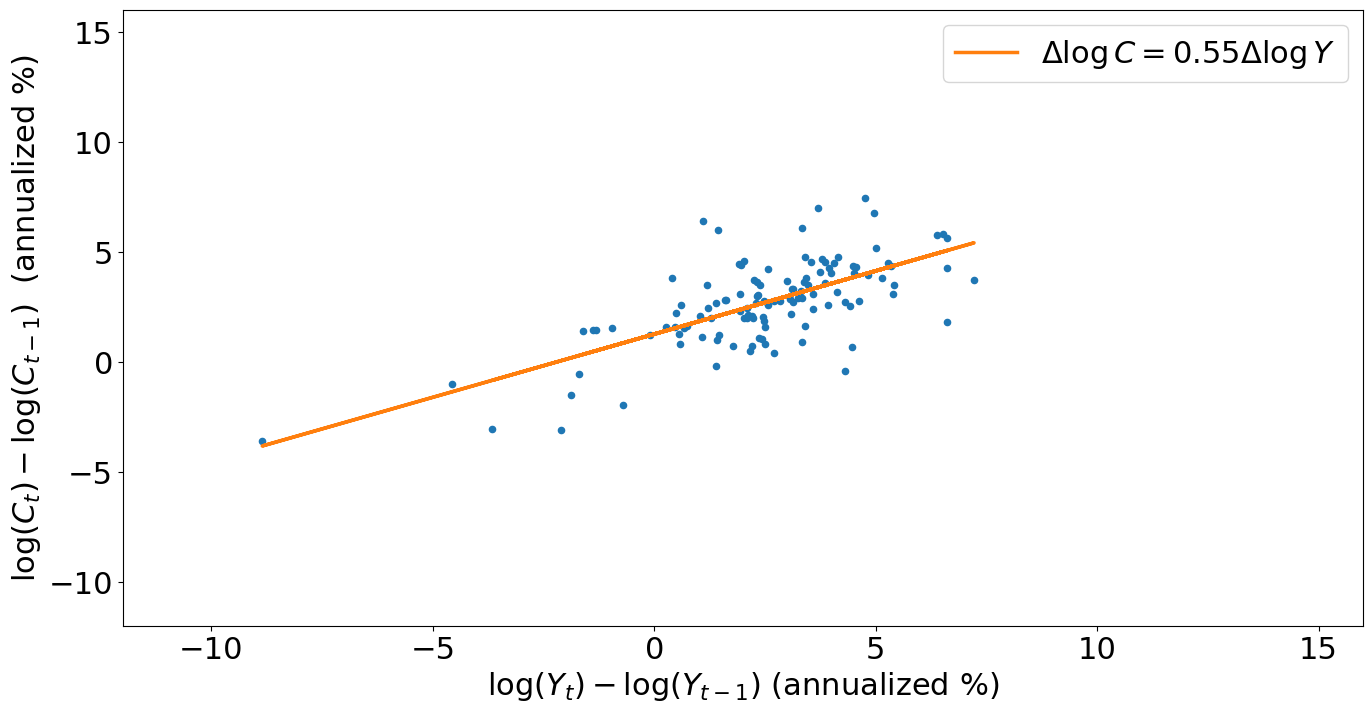

In [28]:
fitted, regparams=reg_fit(duy['dc'],duy['dy'], verbose=True)
duy.plot.scatter(x='dy', y='dc')
plt.plot(duy['dy'], fitted, color='tab:orange', label=r'$\Delta \log C = 0.55 \Delta \log Y$')
plt.xlabel(r'$\log(Y_t)-\log(Y_{t-1})$ (annualized %)')
plt.ylabel(r'$\log(C_t)-\log(C_{t-1})$  (annualized %)')
plt.legend()
plt.xlim(-12,16)
plt.ylim(-12,16)
# plt.savefig(f'Export/okun_C_Y.pdf', format='pdf', transparent=True);

                            OLS Regression Results                            
Dep. Variable:                     di   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     182.6
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           1.22e-25
Time:                        12:08:48   Log-Likelihood:                -407.29
No. Observations:                 119   AIC:                             818.6
Df Residuals:                     117   BIC:                             824.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.3008      1.002     -6.289      0.0

/Users/awellman/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


(-48.0, 54.0)

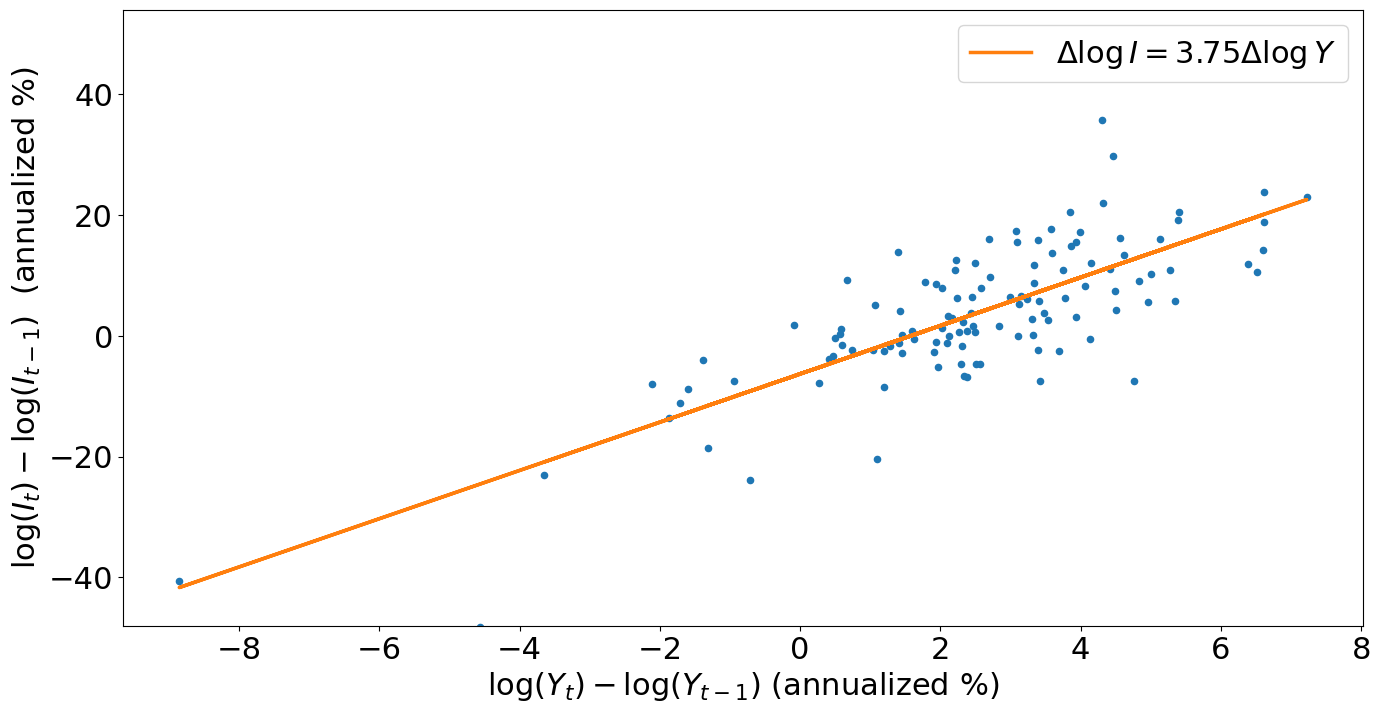

In [29]:
fitted, regparams=reg_fit(duy['di'],duy['dy'], verbose=True)
duy.plot.scatter(x='dy', y='di')
plt.plot(duy['dy'], fitted, color='tab:orange', label=r'$\Delta \log I = 3.75 \Delta \log Y$')
plt.xlabel(r'$\log(Y_t)-\log(Y_{t-1})$ (annualized %)')
plt.ylabel(r'$\log(I_t)-\log(I_{t-1})$  (annualized %)')
plt.legend()
plt.ylim(-12,16)
plt.ylim(-48,54)
# plt.savefig(f'Export/okun_I_Y.pdf', format='pdf', transparent=True);

                            OLS Regression Results                            
Dep. Variable:                     dg   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.854
Date:                Tue, 12 Dec 2023   Prob (F-statistic):              0.176
Time:                        12:08:48   Log-Likelihood:                -291.14
No. Observations:                 119   AIC:                             586.3
Df Residuals:                     117   BIC:                             591.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8525      0.378      2.258      0.0

/Users/awellman/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


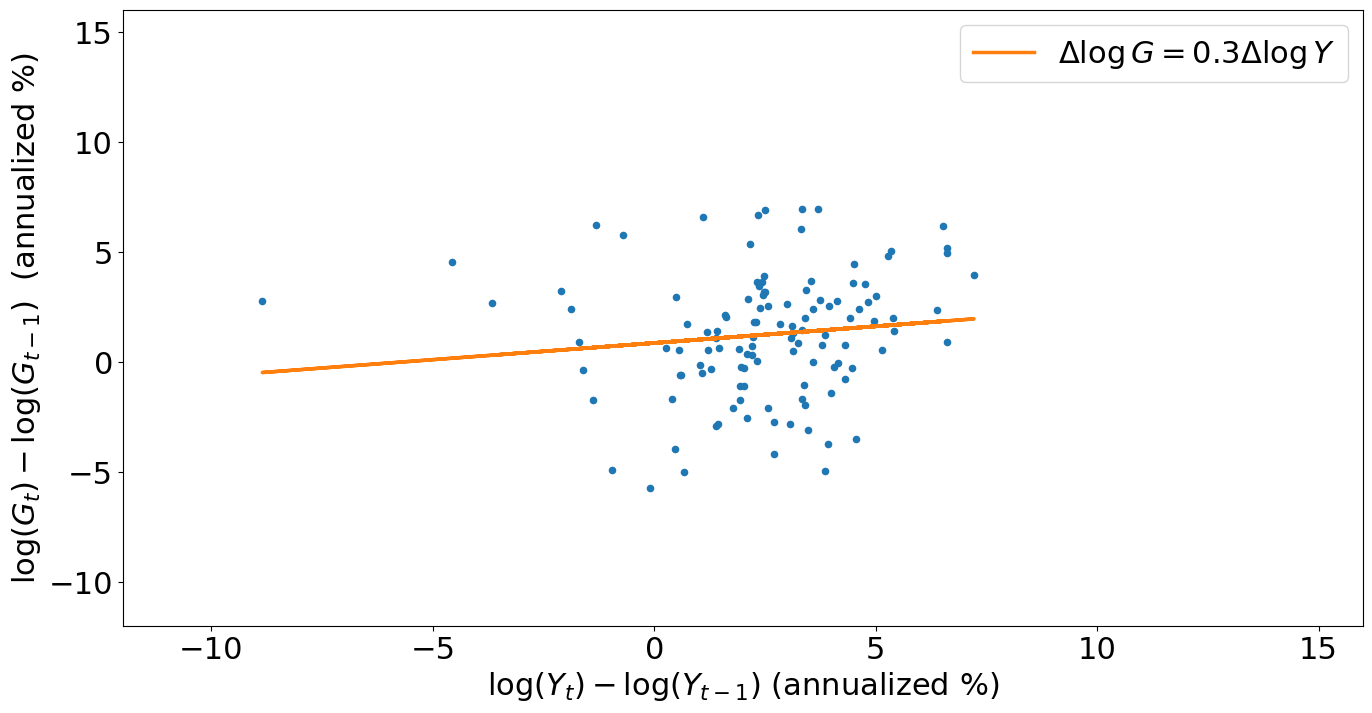

In [30]:
fitted, regparams=reg_fit(duy['dg'],duy['dy'], verbose=True)
duy.plot.scatter(x='dy', y='dg')
plt.plot(duy['dy'], fitted, color='tab:orange', label=r'$\Delta \log G = 0.3 \Delta \log Y$')
plt.xlabel(r'$\log(Y_t)-\log(Y_{t-1})$ (annualized %)')
plt.ylabel(r'$\log(G_t)-\log(G_{t-1})$  (annualized %)')
plt.xlim(-12,16)
plt.ylim(-12,16)
plt.legend()
# plt.savefig(f'Export/okun_G_Y.pdf', format='pdf', transparent=True);

                            OLS Regression Results                            
Dep. Variable:                     dn   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     82.47
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           3.16e-15
Time:                        12:08:48   Log-Likelihood:                -238.76
No. Observations:                 119   AIC:                             481.5
Df Residuals:                     117   BIC:                             487.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6540      0.243     -2.691      0.0

/Users/awellman/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


(-12.0, 16.0)

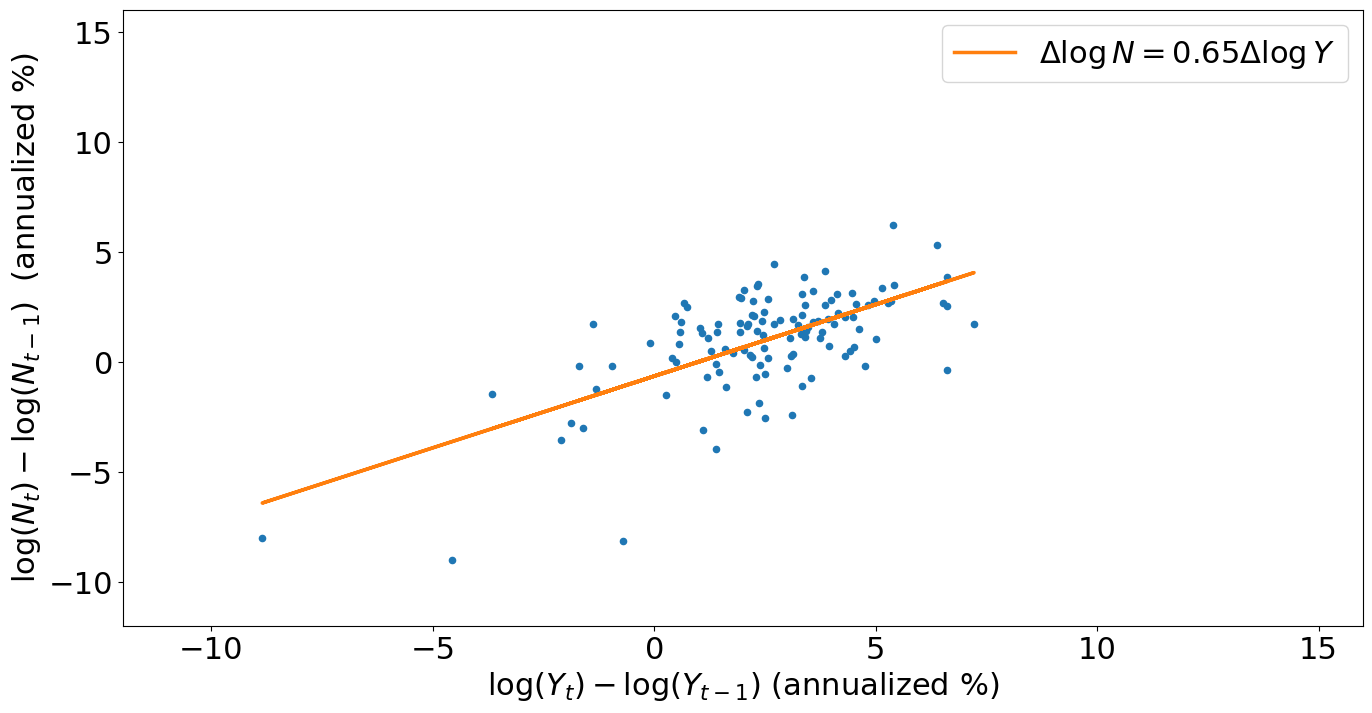

In [31]:
fitted, regparams=reg_fit(duy['dn'],duy['dy'], verbose=True)
duy.plot.scatter(x='dy', y='dn')
plt.plot(duy['dy'], fitted, color='tab:orange', label=r'$\Delta \log N = 0.65 \Delta \log Y$')
plt.xlabel(r'$\log(Y_t)-\log(Y_{t-1})$ (annualized %)')
plt.ylabel(r'$\log(N_t)-\log(N_{t-1})$  (annualized %)')
plt.legend()
plt.xlim(-12,16)
plt.ylim(-12,16)
# plt.savefig(f'Export/okun_N_Y.pdf', format='pdf', transparent=True);

                            OLS Regression Results                            
Dep. Variable:                     de   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     63.69
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           1.11e-12
Time:                        12:08:49   Log-Likelihood:                -206.26
No. Observations:                 119   AIC:                             416.5
Df Residuals:                     117   BIC:                             422.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0201      0.185      0.108      0.9

/Users/awellman/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


(-12.0, 16.0)

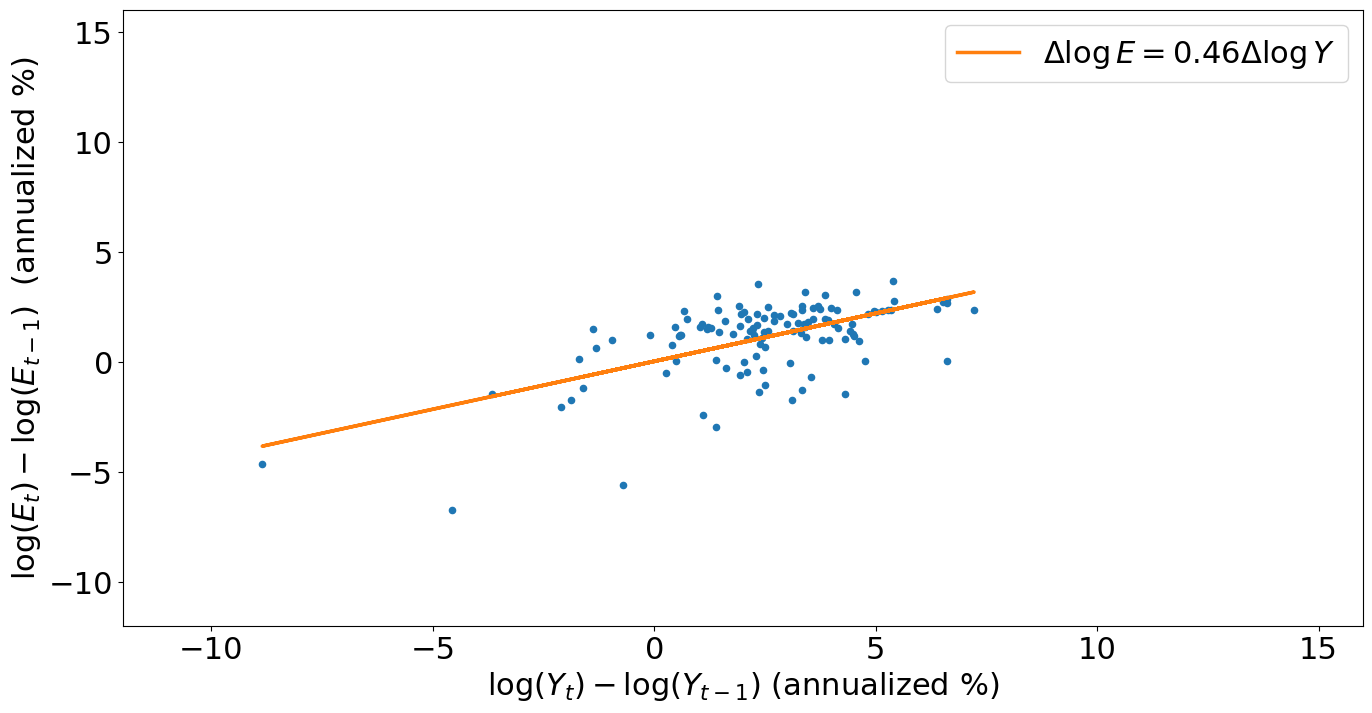

In [32]:
fitted, regparams=reg_fit(duy['de'],duy['dy'], verbose=True)
duy.plot.scatter(x='dy', y='de')
plt.plot(duy['dy'], fitted, color='tab:orange', label=r'$\Delta \log E = 0.46 \Delta \log Y$')
plt.xlabel(r'$\log(Y_t)-\log(Y_{t-1})$ (annualized %)')
plt.ylabel(r'$\log(E_t)-\log(E_{t-1})$  (annualized %)')
plt.legend()
plt.xlim(-12,16)
plt.ylim(-12,16)
# plt.savefig(f'Export/okun_E_Y.pdf', format='pdf', transparent=True);

                            OLS Regression Results                            
Dep. Variable:                     dh   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     30.50
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           2.04e-07
Time:                        12:08:49   Log-Likelihood:                -166.44
No. Observations:                 119   AIC:                             336.9
Df Residuals:                     117   BIC:                             342.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6741      0.132     -5.092      0.0

/Users/awellman/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


(-12.0, 16.0)

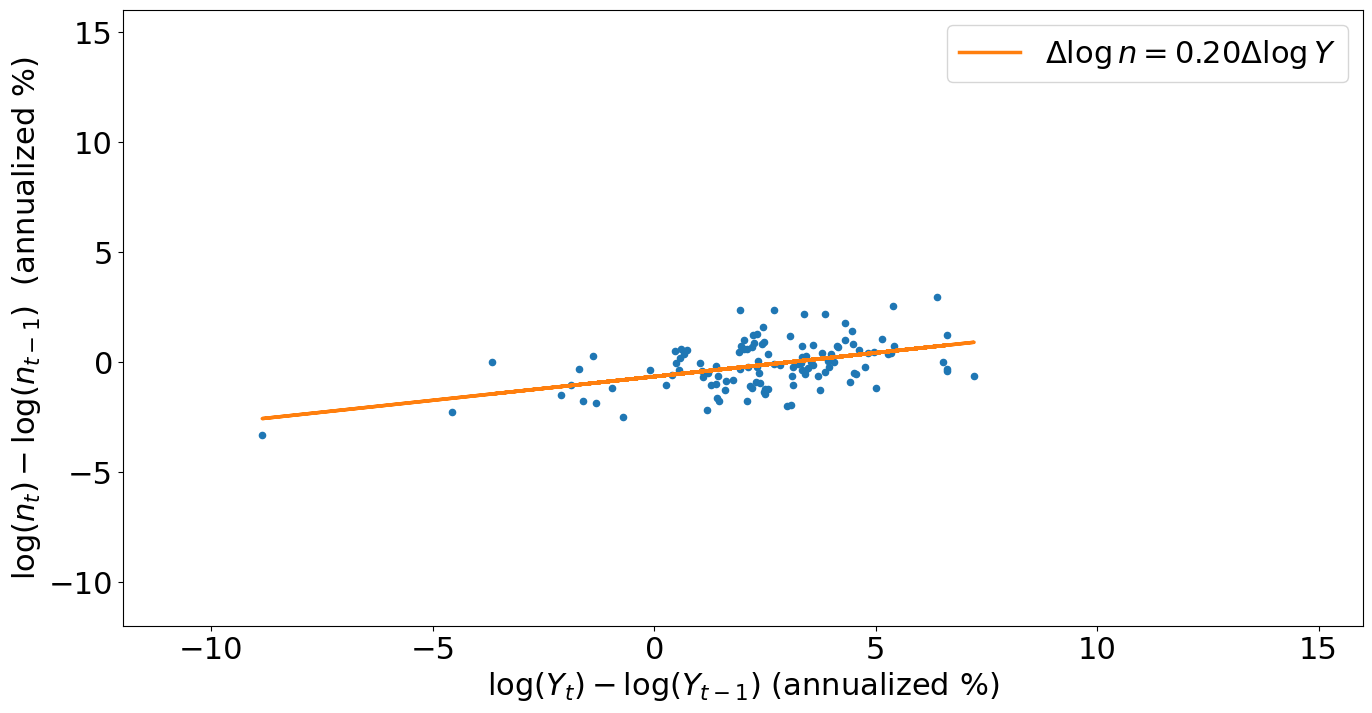

In [33]:
fitted, regparams=reg_fit(duy['dh'],duy['dy'], verbose=True)
duy.plot.scatter(x='dy', y='dh')
plt.plot(duy['dy'], fitted, color='tab:orange', label=r'$\Delta \log n = 0.20 \Delta \log Y$')
plt.xlabel(r'$\log(Y_t)-\log(Y_{t-1})$ (annualized %)')
plt.ylabel(r'$\log(n_t)-\log(n_{t-1})$  (annualized %)')
plt.legend()
plt.xlim(-12,16)
plt.ylim(-12,16)
# plt.savefig(f'Export/okun_h_Y.pdf', format='pdf', transparent=True);

                            OLS Regression Results                            
Dep. Variable:                     dk   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     15.84
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           0.000120
Time:                        12:08:49   Log-Likelihood:                -125.83
No. Observations:                 119   AIC:                             255.7
Df Residuals:                     117   BIC:                             261.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7189      0.094     18.266      0.0

/Users/awellman/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


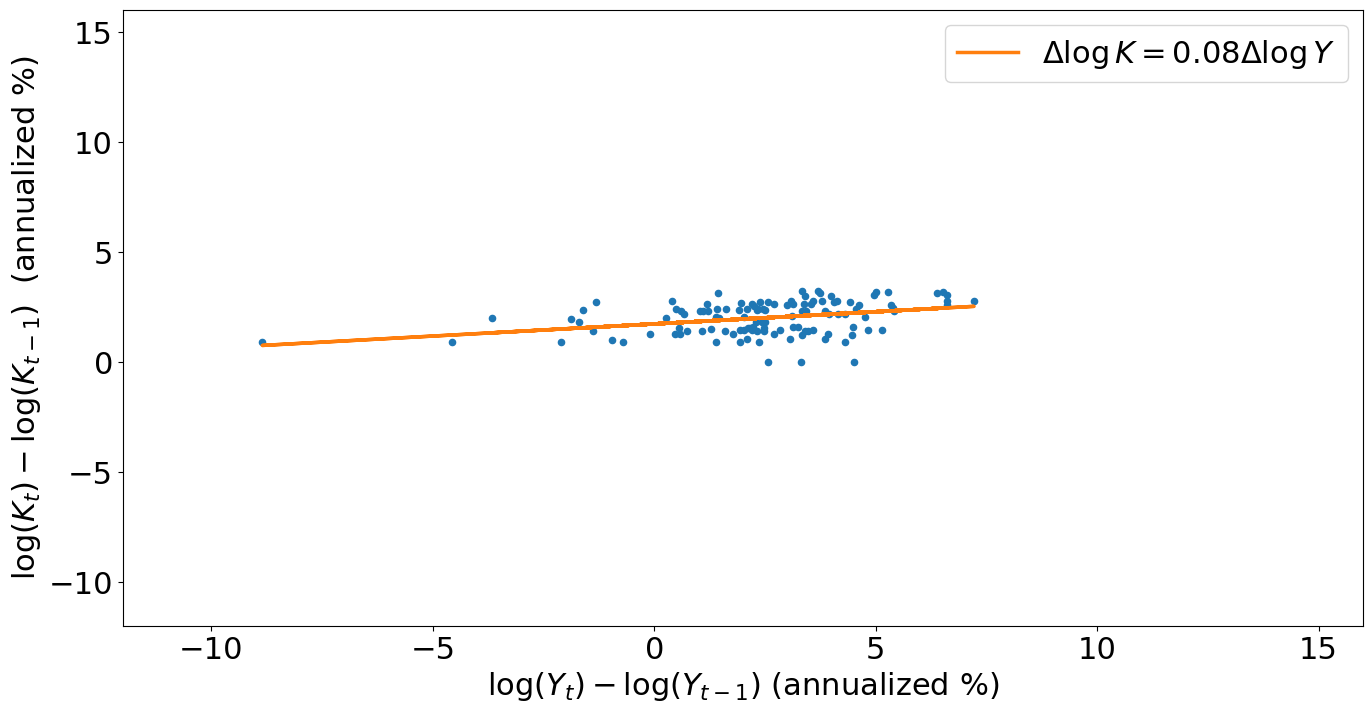

In [34]:
fitted, regparams=reg_fit(duy['dk'],duy['dy'], verbose=True)
duy.plot.scatter(x='dy', y='dk')
plt.plot(duy['dy'], fitted, color='tab:orange', label=r'$\Delta \log K = 0.08 \Delta \log Y$')
plt.xlabel(r'$\log(Y_t)-\log(Y_{t-1})$ (annualized %)')
plt.ylabel(r'$\log(K_t)-\log(K_{t-1})$  (annualized %)')
plt.xlim(-12,16)
plt.ylim(-12,16)
plt.legend()
# plt.savefig(f'Export/okun_K_Y.pdf', format='pdf', transparent=True);

### Contributions to growth in each recession

Verify national accounting identity in original nominal series

In [35]:
series["sumyn"]=series["cn"]+series["in"]+series["gn"]+series["expn"]-series["impn"]
np.max((series["yn"]-series["sumyn"])/series["yn"])

1.6113602173116357e-07

So this is accurate to the 6th digit

Do this at a monthly level and with the same deflator everywhere, so as to preserve adding up

In [36]:
seriesm = data_load.get_fred_data('M','same_def')

Check that we do add up all components

In [37]:
seriesm["sumyn"]=seriesm["cn"]+seriesm["in"]+seriesm["gn"]+seriesm["expn"]-seriesm["impn"]
np.max((seriesm["yn"]-seriesm["sumyn"])/seriesm["yn"])

3.6951228075291693e-06

Construct indicator = 1 if recession begins this month, -1 if it ends this month

In [38]:
seriesm["USREC"].loc['1948-10-31':'1949-01-31']

DATE
1948-10-31    0.0
1948-11-30    0.0
1948-12-31    1.0
1949-01-31    1.0
Freq: M, Name: USREC, dtype: float64

Note the official NBER [webpage](https://www.nber.org/research/data/us-business-cycle-expansions-and-contractions) says that the peak was in November 1948 and trough in October 1949, so make sure our dating is consistent with that

In [39]:
begrec=seriesm["USREC"].diff().shift(-1)

In [40]:
begrec.loc['1948-10-31':'1949-01-31']

DATE
1948-10-31    0.0
1948-11-30    1.0
1948-12-31    0.0
1949-01-31    0.0
Freq: M, Name: USREC, dtype: float64

In [41]:
begrec.loc['1949-09-30':'1949-12-31']

DATE
1949-09-30    0.0
1949-10-31   -1.0
1949-11-30    0.0
1949-12-31    0.0
Freq: M, Name: USREC, dtype: float64

Now store beginning and ends

In [42]:
beg=seriesm.loc[(begrec==1).to_numpy()].rename(columns={"y":"y_start", "i":"i_start", "c":"c_start", "g":"g_start", "imp":"imp_start", "exp":"exp_start"})

In [43]:
end=seriesm.loc[(begrec==-1).to_numpy()].rename(columns={"y":"y_end", "i":"i_end", "c":"c_end", "g":"g_end", "imp":"imp_end", "exp":"exp_end"})

Add date to `end`

In [44]:
end["date_end"]=end.index

In [45]:
end['y_end']

DATE
1949-10-31     2257.294186
1954-05-31     2859.062085
1958-04-30     3141.284526
1961-02-28     3513.496029
1970-11-30     5348.142407
1975-03-31     5985.476179
1980-07-31     7181.784583
1982-11-30     7336.046678
1991-03-31    10003.830018
2001-11-30    14293.347165
2009-06-30    16307.206535
2020-04-30    19034.873917
Name: y_end, dtype: float64

In [46]:
startend=pd.concat([beg[["y_start","i_start", "c_start", "g_start", "imp_start", "exp_start"]],end[["y_end","i_end", "c_end", "g_end", "imp_end", "exp_end","date_end"]]])

In [47]:
startend.sort_index(inplace=True)

In [48]:
for i in ["y_end","i_end", "c_end", "g_end","imp_end", "exp_end", "date_end"]:
    startend[i]=startend[i].shift(-1)

In [49]:
startend.dropna(inplace=True)

In [50]:
startend.head()

,y_start,i_start,c_start,g_start,imp_start,exp_start,y_end,i_end,c_end,g_end,imp_end,exp_end,date_end
DATE,,,,,,,,,,,,,
1948-11-30,2281.954949,398.110580,1454.435495,387.142662,81.507167,123.773379,2257.294186,312.519810,1503.453165,416.298273,75.836183,100.850780,1949-10-31
1953-07-31,2902.723360,455.884535,1733.941822,716.993173,121.007717,116.911546,2859.062085,417.512166,1759.998525,678.896918,117.170525,119.829917,1954-05-31
1957-08-31,3226.253853,516.893549,1952.766465,730.985757,133.109826,158.720158,3141.284526,433.044925,1948.878536,756.232945,133.610649,136.745424,1958-04-30
1960-04-30,3498.286675,563.108554,2147.850262,765.371436,151.645439,173.595397,3513.496029,514.271074,2153.247502,810.679819,139.241182,174.538816,1961-02-28
1969-12-31,5303.186424,857.478892,3181.283350,1247.240797,270.449173,287.634245,5348.142407,844.438524,3228.397514,1258.288528,281.629127,298.646969,1970-11-30


In [51]:
startend["dy"]=100*(startend['y_end']-startend['y_start'])/startend['y_start']
startend["dc"]=100*(startend['c_end']-startend['c_start'])/startend['y_start']
startend["di"]=100*(startend['i_end']-startend['i_start'])/startend['y_start']
startend["dg"]=100*(startend['g_end']-startend['g_start'])/startend['y_start']
startend["dexp"]=100*(startend['exp_end']-startend['exp_start'])/startend['y_start']
startend["-dimp"]=-100*(startend['imp_end']-startend['imp_start'])/startend['y_start']
startend["sum"]=startend["dc"]+startend["di"]+startend["dg"]+startend["dexp"]+startend["-dimp"]

## Now show contribution to growth in each recession

In [52]:
startend[["date_end","dy","sum","dc","di","dg","dexp","-dimp"]].round(1)

,date_end,dy,sum,dc,di,dg,dexp,-dimp
DATE,,,,,,,,
1948-11-30,1949-10-31,-1.1,-1.1,2.1,-3.8,1.3,-1.0,0.2
1953-07-31,1954-05-31,-1.5,-1.5,0.9,-1.3,-1.3,0.1,0.1
1957-08-31,1958-04-30,-2.6,-2.6,-0.1,-2.6,0.8,-0.7,-0.0
1960-04-30,1961-02-28,0.4,0.4,0.2,-1.4,1.3,0.0,0.4
1969-12-31,1970-11-30,0.8,0.8,0.9,-0.2,0.2,0.2,-0.2
1973-11-30,1975-03-31,-2.4,-2.4,0.4,-4.2,0.8,0.8,-0.1
1980-01-31,1980-07-31,-2.2,-2.2,-0.6,-2.9,-0.1,0.1,1.3
1981-07-31,1982-11-30,-2.1,-2.1,1.6,-4.2,1.0,-1.6,1.1
1990-07-31,1991-03-31,-0.9,-0.9,-0.4,-1.6,0.4,0.3,0.5


### Now log and HP

Log and HP filter the series

In [53]:
filtseries = dict()
# HP filters of logs
for r in ['y', 'c', 'g', 'i', 'gdpdef', 'emp', 'h','labprod', 'w']:
    cycle, trend= sm.tsa.filters.hpfilter(np.log(series[r]),100)
    filtseries[r] = cycle

# just levels
for r in ['pce_infl', 'fedfunds', 'u']:
    filtseries[r] = series[r]/100


# verify units
df = pd.DataFrame(filtseries)
df.tail()

,y,c,g,i,gdpdef,emp,h,labprod,w,pce_infl,fedfunds,u
date,,,,,,,,,,,,
2022-09-30,-0.001463,0.001529,-0.014913,-0.003614,0.011497,0.009080,0.000622,-0.012418,0.001173,0.050,0.021900,0.035667
2022-12-31,-0.001593,-0.003105,-0.005282,0.000065,0.007691,0.006750,-0.000629,-0.008038,-0.010011,0.047,0.036533,0.036000
2023-03-31,-0.002477,-0.001094,0.002543,-0.027647,0.004388,0.004562,-0.000090,-0.009739,-0.004119,0.050,0.045167,0.035000
2023-06-30,-0.003818,-0.006209,0.006447,-0.018932,-0.004230,0.000495,-0.002583,-0.000933,0.000993,0.037,0.049900,0.035667
2023-09-30,0.002284,-0.004459,0.015389,0.002053,-0.008223,-0.003995,-0.001716,0.011726,0.000657,0.023,0.052600,0.037000


In [54]:
series

,yn,cn,gn,in,nxn,impn,expn,y,c,g,...,dgs10,breakeven10,nondur,dur,ypop,t,ylogfit,ylog,t_sq,sumyn
date,,,,,,,,,,,,,,,,,,,,,
1990-03-31,5872.701,3737.948,1212.450,1010.838,-88.536,626.767,538.232,10047.386,6357.213,2534.913,...,8.423871,NaN,222851.0,115376.0,0.040378,0,9.248577,9.215068,0,5872.701
1990-06-30,5960.028,3783.421,1230.721,1014.720,-68.833,614.759,545.925,10083.855,6376.579,2538.916,...,8.674127,NaN,243336.0,127376.0,0.040404,1,9.254508,9.218691,1,5960.028
1990-09-30,6015.116,3846.700,1242.584,1000.785,-74.953,630.102,555.149,10090.569,6401.841,2542.963,...,8.701270,NaN,248898.0,122808.0,0.040291,2,9.260438,9.219357,4,6015.116
1990-12-31,6004.733,3867.909,1268.467,947.453,-79.096,647.282,568.186,9998.704,6353.139,2559.964,...,8.405968,NaN,279136.0,131520.0,0.039781,3,9.266369,9.210211,9,6004.733
1991-03-31,6035.178,3873.562,1284.187,924.569,-47.140,620.317,573.177,9951.916,6329.249,2575.220,...,8.022833,NaN,232987.0,105162.0,0.039471,4,9.272300,9.205520,16,6035.178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,25994.639,17684.189,4477.855,4724.621,-892.026,3976.524,3084.498,21851.134,15127.399,3666.982,...,3.101094,2.421250,968962.0,534857.0,0.065479,130,10.019589,9.992008,16900,25994.639
2022-12-31,26408.405,17917.039,4572.408,4796.162,-877.204,3891.004,3013.800,21989.981,15171.391,3714.800,...,3.826721,2.340000,1041528.0,562801.0,0.065796,131,10.025520,9.998342,17161,26408.405
2023-03-31,26813.601,18269.569,4643.890,4725.828,-825.687,3890.491,3064.804,22112.329,15312.850,3758.768,...,3.646290,2.290806,924822.0,510804.0,0.066089,132,10.031451,10.003891,17424,26813.600


## Plot some series vs trends

In [55]:
filtseries = dict()
seriespre=series.loc['1952-03-31':'2019-12-31']

# HP filters of logs
for r in ['y', 'c', 'g', 'i', 'gdpdef', 'emp', 'h','labprod', 'w']:
    cycle, trend= sm.tsa.filters.hpfilter(np.log(seriespre[r]),100)
    filtseries[r] = cycle

# verify units
filtseries = pd.DataFrame(filtseries)

Procyclical variables

Text(0.5, 1.0, 'Cyclical components of log Y, C, N')

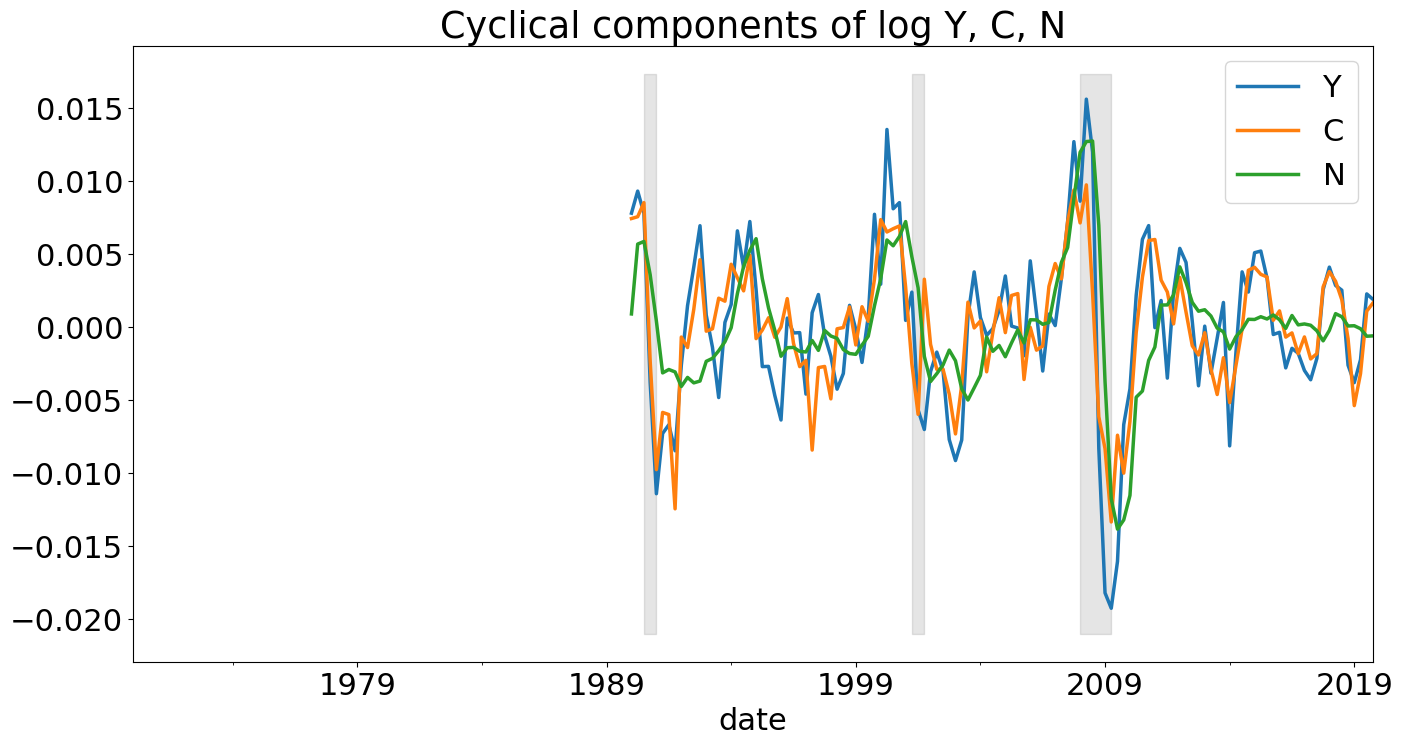

In [56]:
filtseries['y'].plot(label='Y')
filtseries['c'].plot(label='C')
filtseries['emp'].plot(label='N')
#filtseries['i'].plot(label='I')
yl, yh = plt.ylim()
plt.xlim('1970-03-31','2019-12-31')
plt.legend()
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title('Cyclical components of log Y, C, N')
# plt.savefig(f'Export/us_log_realgdp_components.pdf', format='pdf', transparent=True);

### Historical CPI data

In [57]:
df_cpi = data_load.get_historical_cpi()

FileNotFoundError: [Errno 2] No such file or directory: 'Import/USCPI_1774-2020.csv'

In [ ]:
df_cpi["cpi"][2020]/df_cpi["cpi"][1774]

In [ ]:
df_cpi["cpi"][1933]

In [ ]:
np.exp(3)

In [ ]:
df_cpi["cpi"][2020]/df_cpi["cpi"][1933]

In [ ]:
(np.log(df_cpi['cpi'])-np.log(df_cpi['cpi'][1774])).plot()
plt.title(r"U.S Consumer Price index $P_t$ since 1774")
plt.ylabel(r'$\log(P_t/P_{0})$')
# plt.savefig(f'Export/us_log_cpi.pdf', format='pdf', transparent=True);

In [ ]:
np.exp(3.5)

In [ ]:
(100* np.log(df_cpi['cpi']).diff()).plot()
plt.title(r"U.S CPI inflation rate (100 $\Delta \log(P_t)$)")
plt.axhline(0, linestyle='--', color='gray')
plt.xlim(1960,2020)
plt.ylim(-1,13)
plt.ylabel(r'$100 \Delta \log(P_t)$')
#plt.savefig(f'Export/us_log_infl.pdf', format='pdf', transparent=True);

In [ ]:
series['cpi'].diff()

In [ ]:
yoy=100*(series['cpi']-series['cpi'].shift(4))/series['cpi'].shift(4)

In [ ]:
plt.figure
yoy.plot(label=r'$\pi_t$')
yl, yh = plt.ylim()
plt.title(r'Consumer Price Index inflation $\pi_t$')
plt.ylabel(r'Year over year change (%)')
plt.axhline(2, linestyle='--', color='gray', linewidth=2, label=r'2 %')
plt.legend()
plt.axhline(0, color='black', linewidth=1)
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
# plt.savefig(f'Export/us_infl.pdf', format='pdf', transparent=True);

### Money

In [ ]:
m1data=series[['m2','m1', 'currcir','USREC','cpi', 'yn']]['2000-01':]

Levels

In [ ]:
plt.figure()
(m1data['m2']/1000).plot(label='M2')
(m1data['m1']/1000).plot(label='M1')
(m1data['currcir']/1000).plot(label='Currency')
plt.axhline(0, color='black', linewidth=1)
yl, yh = plt.ylim()
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.legend()
plt.title(r'Measures of the money supply')
plt.ylabel(r'$trn')
# plt.savefig(f'Export/us_m1.pdf', format='pdf', transparent=True);

In [ ]:
m1data['2020-03':]

In [ ]:
plt.figure()
(np.log(m1data['m2'])-np.log(m1data['m2'][0])).plot(label='M2')
(np.log(m1data['m1'])-np.log(m1data['m1'][0])).plot(label='M1')
(np.log(m1data['currcir'])-np.log(m1data['currcir'][0])).plot(label='curr')
#(m1data['m1']/1000).plot(label='M1')
#(m1data['currcir']/1000).plot(label='Currency')

Annualized growth rate

In [ ]:
NQ1=m1data.index.size 

In [ ]:
print('Annualized log growth rate M2 =',(np.log(m1data['m2'][-1])-np.log(m1data['m2'][0]))/(NQ1/4))
print('Annualized log growth rate M1 =',(np.log(m1data['m1'][-1])-np.log(m1data['m1'][0]))/(NQ1/4))
print('Annualized log growth rate curr =',(np.log(m1data['currcir'][-1])-np.log(m1data['currcir'][0]))/(NQ1/4))
print('Annualized log growth rate prices =',(np.log(m1data['cpi'][-1])-np.log(m1data['cpi'][0]))/(NQ1/4))
print('Annualized log growth rate GDP =',(np.log(m1data['yn'][-2])-np.log(m1data['yn'][0]))/((NQ1-1)/4))

In [ ]:
m1data

### Reserves

In [ ]:
seriesm['totres'].plot()
yl, yh = plt.ylim()
plt.ylabel('$bn')
# Draw shaded for recession
plt.fill_between(seriesm.index, yl, yh, where=seriesm['USREC'].values, color='k', alpha=0.1)
plt.xlim('1980-01-01','2021-01-01')
plt.title(r'Bank reserves ($M_t^{res}$)')
# plt.savefig(f'Export/reserves.pdf', format='pdf', transparent=True);

Replace IOER series with 0s

In [ ]:
seriesm['ioer'].fillna(0, inplace=True)

In [ ]:
seriesm['fedfunds'].plot(label=r'Fed Funds rate $i_t$')
seriesm['ioer'].plot(label=r'on reserves $i_t^{res}$')
yl, yh = plt.ylim()
plt.ylabel('$bn')
plt.legend()
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.xlim('1980-01-01','2021-01-01')
plt.title(r'Interest rates')
# plt.savefig(f'Export/intrates.pdf', format='pdf', transparent=True);

### Output gap

In [ ]:
(np.log(series['y'])-np.log(series['y'][0])).plot(label='GDP $Y_t$')
(np.log(series['ypot'])-np.log(series['y'][0])).plot(label='Potential GDP $Y_t^{pot}$')
yl, yh = plt.ylim()
plt.legend()
plt.ylabel(r'$\log(Y_t/Y_{0})$')
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title('U.S. real GDP ($Y_t$) vs potential ($Y_t^{pot}$)')
# plt.savefig(f'Export/gdp_v_potential.pdf', format='pdf', transparent=True);

In [ ]:
(100*(np.log(series['y'])-np.log(series['ypot']))).plot()
yl, yh = plt.ylim()
plt.ylabel(r'$\log(Y_t/Y_{t}^{pot})$ (per cent)')
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('U.S. output gap $log(Y_t/Y_t^{pot})$')
# plt.savefig(f'Export/outputgap.pdf', format='pdf', transparent=True);

Phillips curve examination

In [ ]:
series['cpi']

In [ ]:
pi_yoy=100*(series['cpi']-series['cpi'].shift(4))/series['cpi'].shift(4)
pidiff=pi_yoy.diff(4) # change in inflation over the previous year!
ygap=(100*(series['y']-series['ypot'])/series['ypot'])
pi_qd=pi_yoy-0.5*pi_yoy.shift(-4)

In [ ]:
pi_qd

In [ ]:
pidiff

In [ ]:
df=pd.DataFrame(data={'pi':pi_yoy[9:-4],'pidiff':pidiff[9:-4], 'ygap':ygap[9:-4], 'pi_qd':pi_qd[9:-4]})
df.corr()

In [ ]:
df

In [ ]:
df['label']=df.index.year

In [ ]:
df

Version in levels

In [ ]:
fitted, regparams=reg_fit(df['pi'],df['ygap'], verbose=True)
df.plot.scatter(x='ygap', y='pi')
plt.plot(df['ygap'], fitted, color='tab:orange')
plt.xlabel(r'$(Y_t/Y_t^{pot})$ (annualized %)')
plt.ylabel(r'$\pi_t$  (annualized %)')
#plt.legend()
#plt.xlim(-12,16)
#plt.ylim(-12,16)

In [ ]:
fitted, regparams=reg_fit(df['pidiff'],df['ygap'], verbose=True)
ax=df.plot.scatter(x='ygap', y='pidiff')
# if I want to label the dates
#df[['ygap','pidiff','label']].apply(lambda x: ax.text(*x),axis=1)
# Bottom left are 1982 and 2009. Top right are 
plt.plot(df['ygap'], fitted, color='tab:orange', label='Slope = 0.33')
plt.legend()
plt.xlabel(r'$(Y_t-Y_t^{pot})/Y_t^{pot}$ (annualized %)')
plt.ylabel(r'$\pi_t - \pi_{t-1}$  (annualized %)')
# plt.savefig(f'Export/phillipscurvedelta.pdf', format='pdf', transparent=True);

In [ ]:
fitted, regparams=reg_fit(df['pi_qd'],df['ygap'], verbose=True)
ax=df.plot.scatter(x='ygap', y='pi_qd')
# if I want to label the dates
#df[['ygap','pidiff','label']].apply(lambda x: ax.text(*x),axis=1)
plt.plot(df['ygap'], fitted, color='tab:orange')
plt.xlabel(r'$(Y_t-Y_t^{pot})/Y_t^{pot}$ (annualized %)')
plt.ylabel(r'$\pi_t - \pi_{t+1}$  (annualized %)')

Really jumps at you that the data likes the actual difference version much better than the QD version

In [ ]:
seriesd = data_load.get_fred_data('D','same_def')
seriesd=seriesd.loc['2014-01-01':'2021-03-12']

Get recession indicator for whole period

In [ ]:
seriesd['USREC'].interpolate(method='linear', inplace=True)
seriesd['dgs10'].interpolate(method='linear', inplace=True)
seriesd['breakeven10'].interpolate(method='linear', inplace=True)

In [ ]:
seriesd['dgs10'].plot()
# Draw shaded for recession
yl,yh=plt.ylim()
plt.fill_between(seriesd.index, yl, yh, where=seriesd['USREC'].values, color='k', alpha=0.1)
plt.xlabel('Date')
plt.ylabel('Per cent')
plt.title('US 10-year Treasury Rate')
# plt.savefig(f'Export/treasury10year.pdf', format='pdf', transparent=True);

In [ ]:
seriesd['breakeven10'].plot()
# Draw shaded for recession
yl,yh=plt.ylim()
plt.fill_between(seriesd.index, yl, yh, where=seriesd['USREC'].values, color='k', alpha=0.1)
plt.xlabel('Date')
plt.ylabel('Per cent')
plt.title('US 10-year Breakeven Inflation rate')
# plt.savefig(f'Export/breakeven10year.pdf', format='pdf', transparent=True);